In [1]:
import torch
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import torch.nn as nn
import pickle
import random as rd
import torch.optim as optim
import numpy as np
import sys as s
import matplotlib.pyplot as plt
import math


#           GERANDO O BANCO DE DADOS

In [41]:
from Dataset_Generator import Dataset

In [42]:
Dataset(1,2,300)

XC = (1, 2, 1)
inp = torch.Size([1, 2, 300])
out = torch.Size([1, 2, 300])


In [31]:
inp = pickle.load(open("inp", "rb"))
out = pickle.load(open("out", "rb"))
XC = pickle.load(open("XC", "rb"))
n_batch = np.shape(inp)[0]
batch_size = np.shape(inp)[1]
n_examples = np.shape(inp)[2]

In [32]:
print(inp[0][0])
print(out[0][0])

tensor([  0.0000,   1.0033,   2.0067,   3.0100,   4.0134,   5.0167,   6.0201,
          7.0234,   8.0268,   9.0301,  10.0334,  11.0368,  12.0401,  13.0435,
         14.0468,  15.0502,  16.0535,  17.0569,  18.0602,  19.0635,  20.0669,
         21.0702,  22.0736,  23.0769,  24.0803,  25.0836,  26.0870,  27.0903,
         28.0936,  29.0970,  30.1003,  31.1037,  32.1070,  33.1104,  34.1137,
         35.1171,  36.1204,  37.1237,  38.1271,  39.1304,  40.1338,  41.1371,
         42.1405,  43.1438,  44.1472,  45.1505,  46.1538,  47.1572,  48.1605,
         49.1639,  50.1672,  51.1706,  52.1739,  53.1773,  54.1806,  55.1839,
         56.1873,  57.1906,  58.1940,  59.1973,  60.2007,  61.2040,  62.2074,
         63.2107,  64.2140,  65.2174,  66.2207,  67.2241,  68.2274,  69.2308,
         70.2341,  71.2375,  72.2408,  73.2441,  74.2475,  75.2508,  76.2542,
         77.2575,  78.2609,  79.2642,  80.2676,  81.2709,  82.2742,  83.2776,
         84.2809,  85.2843,  86.2876,  87.2910,  88.2943,  89.29

# 
# DEFINE O MODELO
# 



In [40]:
class Autoencoder(nn.Module):
    def __init__(self):
        # N, 50
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(1, 300),
            nn.ELU(),
            nn.Linear(300, 600),
            nn.ELU(),
            nn.Linear(600, 300),
            nn.ELU(),
            nn.Linear(300, 1),
            nn.ELU(),
        )        
    def forward(self, x):
        encoded = self.encoder(x)
        return encoded


# -------------------------------------------------------------------------------
# ------------------CHAMA O MODELO E INICIA CAMADAS DE PESOS ORTOGONAIS----------
# -------------------------------------------------------------------------------
model = Autoencoder()
for m in model.modules():
    if isinstance(m, (nn.Conv2d, nn.Linear)):
        nn.init.orthogonal_(m.weight)
criterion = nn.MSELoss()  # segundo a investigar
# ,lr=1e-4,weight_decay = 1e-5)
optimizer = torch.optim.Adam(model.parameters())
# optimizer = torch.optim.SGD(model.parameters(),lr=1e-4,weight_decay = 1e-5)#,momentum=0.5)
# -------------------------------------------------------------------------------



# ------TREINO DO DECODER MODIFICADO--O[5]+Q[11] >> OUTPUT[1]--------------------
# -------------------------------------------------------------------------------

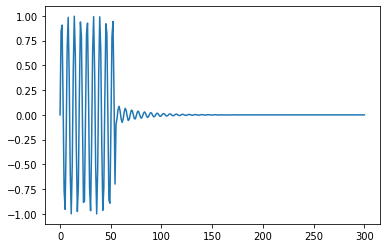

In [34]:
inp = pickle.load(open("inp", "rb"))
out = pickle.load(open("out", "rb"))
plt.plot(inp[0][0],out[0][0])
plt.show()

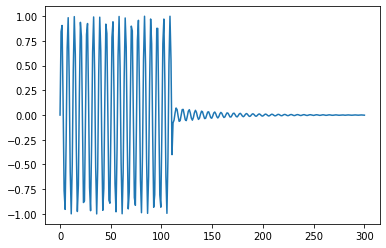

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x300 and 1x300)

In [47]:
def treine(epochs):
    inp = pickle.load(open("inp", "rb"))
    out = pickle.load(open("out", "rb"))
    n_batch = np.shape(inp)[0]
    batch_size = np.shape(inp)[1]
    n_examples = np.shape(inp)[2]
    for epoch in range(epochs):
        for n_batch_idx in range(n_batch):
            for batch_idx in range(n_batch):
                I = inp[n_batch_idx][batch_idx]
                A = out[n_batch_idx][batch_idx]
                plt.plot(I,A)
                plt.show()
                I = I.float()
                A = A.float()
                recon = model(I)
                loss = torch.mean((recon-A)**2)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                s.exit()
                for j in range(n_examples):

                    x = I[j+10].float()
                    y = A[j+10].float()
                    print(x)
                    print(y)
                    recon = model(x)
                    loss = torch.mean((recon-y)**2)
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()
        print(f'Epoch:{epoch+1},Loss:{loss.item():.4f}')



treine(200)

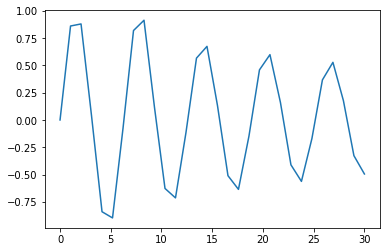

tensor([ 0.0000,  0.8596,  0.8785,  0.0381, -0.8395, -0.8960, -0.0762,  0.8182,
         0.9123,  0.1142, -0.6265, -0.7129, -0.1141,  0.5658,  0.6733,  0.1325,
        -0.5097, -0.6349, -0.1476,  0.4580,  0.5977,  0.1597, -0.4104, -0.5618,
        -0.1693,  0.3666,  0.5272,  0.1765, -0.3264, -0.4940])
--------------------
tensor([ 0.0000,  0.8596,  0.8785,  0.0381, -0.8395, -0.8960, -0.0762,  0.8182,
         0.9123,  0.1142, -0.6265, -0.7129, -0.1141,  0.5658,  0.6733,  0.1325,
        -0.5097, -0.6349, -0.1476,  0.4580,  0.5977,  0.1597, -0.4104, -0.5618,
        -0.1693,  0.3666,  0.5272,  0.1765, -0.3264, -0.4940])
--------------------
tensor([ 0.0000,  1.0345,  2.0690,  3.1034,  4.1379,  5.1724,  6.2069,  7.2414,
         8.2759,  9.3103, 10.3448, 11.3793, 12.4138, 13.4483, 14.4828, 15.5172,
        16.5517, 17.5862, 18.6207, 19.6552, 20.6897, 21.7241, 22.7586, 23.7931,
        24.8276, 25.8621, 26.8966, 27.9310, 28.9655, 30.0000])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x30 and 1x300)

In [24]:
def treine(epochs):
    inp = pickle.load(open("inp", "rb"))
    out = pickle.load(open("out", "rb"))
    n_batch = np.shape(inp)[0]
    batch_size = np.shape(inp)[1]
    n_examples = np.shape(inp)[2]
    for epoch in range(epochs):
        for batch_idx in range(n_batch):
            I = inp[batch_idx]
            A = out[batch_idx]
            plt.plot(I[0],A[0])
            plt.show()
            I = I.float()
            A = A.float()
            print(A[0])
            print('-'*20)
            print(A[0])
            print('-'*20)
            for i in I:
                for j in range(len(n_examples)):
                    print(i)
                    recon, latent = model(i[j])
                    loss = torch.mean((recon-A)**2)
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()
        print(f'Epoch:{epoch+1},Loss:{loss.item():.4f}')
        s.exit()



treine(200)
# print('end')
# -------------------------------------------------------------------------------
# --------------------- SALVANDO-------------------------------------------------
# -------------------------------------------------------------------------------
# PATH_save='Estado_Box_2_with_two_latent.pt'
##PATH_load = 'Estado_Box_2_with_two_latent.pt'
#torch.save(model.state_dict(), PATH_save)
# s.exit()
##model.load_state_dict(torch.load(PATH_load))
#torch.save(model.state_dict(), PATH_save)


# 
# GRÁFICOS
# 

In [ ]:
def Latent_values_Scynet():
    for aux in range(n_batch):
        O = inp[aux].float()
        Q = question[aux].float()
        A = out[aux].float()
        j = J[aux]
        x = np.zeros(np.shape(j)[0])
        y1 = np.zeros(np.shape(j)[0])
        y2 = np.zeros(np.shape(j)[0])
        recon, latent = model(O, Q)
        for i in range(0, 499):
            x[i] = j[i]
            y1[i] = latent[i, 0]
            y2[i] = latent[i, 1]
        plt.scatter(x, y1, label='Latent Activation 1')
        plt.scatter(x, y2, label='Latent Activation 2')
        plt.xlabel('Momento angular total')
        plt.ylabel('Latent Activation')
        plt.legend()
        plt.pause(1.5)
        plt.close()

    plt.show()


Latent_values_Scynet()
# s.exit()
# -------------------------------------------------------------------------------
